In [18]:
# N QUEEEEEEN

from itertools import permutations


def board(vec):
    """Translate column positions to an equivalent chess board."""
    for col in vec:
        s = [" - "] * len(vec)
        s[col] = "Q"
        print("".join(s))


n = 4
cols = list(range(n))
solution_count = 0

for vec in permutations(cols):
    valid = all(
        abs(vec[i] - vec[j]) != j - i for i in range(n) for j in range(i + 1, n)
    )

    if valid:
        solution_count += 1
        print()
        print()
        print(f"Solution {solution_count}:")
        print()
        print()
        board(vec)



Solution 1:


 - Q -  - 
 -  -  - Q
Q -  -  - 
 -  - Q - 


Solution 2:


 -  - Q - 
Q -  -  - 
 -  -  - Q
 - Q -  - 


In [1]:
# 8 PUZZLE

# Define the initial state of the 8-puzzle problem as a list
initial_state = [1, 2, 3, 5, 6, 0, 7, 8, 4]

# Define the goal state
goal_state = [1, 2, 3, 5, 8, 6, 0, 7, 4]


# Define a function to calculate the number of misplaced tiles
def calculate_misplaced_tiles(state):
    return sum(1 for i, j in zip(state, goal_state) if i != j)


# Define a function to generate neighboring states by swapping the empty tile with adjacent tiles
def generate_neighbors(state):
    neighbors = []
    empty_tile_index = state.index(0)
    rows, cols = 3, 3

    # Define possible moves (up, down, left, right)
    possible_moves = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    for move in possible_moves:
        new_row = empty_tile_index // cols + move[0]
        new_col = empty_tile_index % cols + move[1]

        if 0 <= new_row < rows and 0 <= new_col < cols:
            new_state = state[:]
            new_index = new_row * cols + new_col
            new_state[empty_tile_index], new_state[new_index] = (
                new_state[new_index],
                new_state[empty_tile_index],
            )
            neighbors.append(new_state)

    return neighbors


# Define the hill climbing search algorithm
def hill_climbing_search(initial_state):
    current_state = initial_state
    current_cost = calculate_misplaced_tiles(current_state)

    while True:
        # Print the current puzzle state
        print("Current State:")
        for i in range(0, 9, 3):
            print(current_state[i : i + 3])

        neighbors = generate_neighbors(current_state)
        if not neighbors:
            break

        best_neighbor = min(neighbors, key=calculate_misplaced_tiles)
        best_cost = calculate_misplaced_tiles(best_neighbor)

        if best_cost >= current_cost:
            break

        current_state = best_neighbor
        current_cost = best_cost

    return current_state


# Solve the 8-puzzle problem using hill climbing search
solution = hill_climbing_search(initial_state)

# Print the goal state
print("\nGoal State:")
for i in range(0, 9, 3):
    print(goal_state[i : i + 3])

Current State:
[1, 2, 3]
[5, 6, 0]
[7, 8, 4]
Current State:
[1, 2, 3]
[5, 0, 6]
[7, 8, 4]
Current State:
[1, 2, 3]
[5, 8, 6]
[7, 0, 4]
Current State:
[1, 2, 3]
[5, 8, 6]
[0, 7, 4]

Goal State:
[1, 2, 3]
[5, 8, 6]
[0, 7, 4]


In [6]:
# RES INFERNECE


def resolve(clause1, clause2):
    return [literal for literal in clause1 if -literal not in clause2] + [
        literal for literal in clause2 if -literal not in clause1
    ]


def can_resolve(clause1, clause2):
    return any(-literal in clause2 for literal in clause1) or any(
        -literal in clause1 for literal in clause2
    )


def resolution(clauses):
    new_clauses = clauses.copy()
    while True:
        n = len(new_clauses)
        for i in range(n):
            for j in range(i + 1, n):
                if can_resolve(new_clauses[i], new_clauses[j]):
                    resolvent = resolve(new_clauses[i], new_clauses[j])
                    if not resolvent:
                        return True  # Contradiction found
                    if resolvent not in new_clauses:
                        new_clauses.append(resolvent)
        if len(new_clauses) == n:
            return False  # No new clauses can be generated


# Example usage
clauses = [[-1, 2], [-1, 4], [2, 2], [-4, 2]]
result = resolution(clauses)
print(
    "The clauses are unsatisfiable (contradictory)."
    if result
    else "The clauses are satisfiable."
)

The clauses are satisfiable.


+-----------+---------------+
| Letter    |   phi(Letter) |
+===========+===============+
| Letter(0) |        0.7980 |
+-----------+---------------+
| Letter(1) |        0.2020 |
+-----------+---------------+


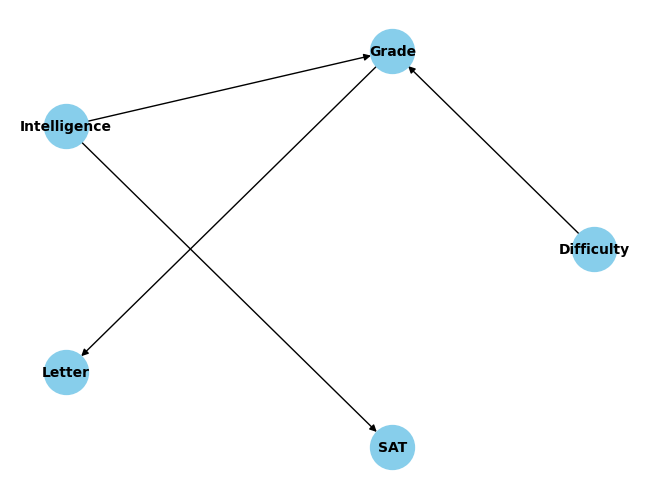

In [10]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination

# Defining Bayesian Structure
model = BayesianNetwork(
    [
        ("Difficulty", "Grade"),
        ("Intelligence", "Grade"),
        ("Grade", "Letter"),
        ("Intelligence", "SAT"),
    ]
)

# Defining the CPDs:
cpd_difficulty = TabularCPD("Difficulty", 2, [[0.6], [0.4]])
cpd_intelligence = TabularCPD("Intelligence", 2, [[0.7], [0.3]])
cpd_grade = TabularCPD(
    "Grade",
    3,
    [[0.3, 0.05, 0.9, 0.5], [0.4, 0.25, 0.08, 0.3], [0.3, 0.7, 0.02, 0.2]],
    evidence=["Difficulty", "Intelligence"],
    evidence_card=[2, 2],
)
cpd_letter = TabularCPD(
    "Letter",
    2,
    [[0.1, 0.4, 0.99], [0.9, 0.6, 0.01]],
    evidence=["Grade"],
    evidence_card=[3],
)
cpd_sat = TabularCPD(
    "SAT", 2, [[0.95, 0.2], [0.05, 0.8]], evidence=["Intelligence"], evidence_card=[2]
)

# Associating the CPDs with the network structure.
model.add_cpds(cpd_difficulty, cpd_intelligence, cpd_grade, cpd_letter, cpd_sat)

# Check the model
model.check_model()

# Inference with Variable Elimination
infer = VariableElimination(model)

# Query the probability of getting a good Letter given Intelligence and Difficulty
posterior_p = infer.query(["Letter"], evidence={"Intelligence": 1, "Difficulty": 0})
print(posterior_p)

# Draw the Bayesian Network using NetworkX
pos = nx.circular_layout(model)  # Change layout method if needed
labels = {node: node for node in model.nodes()}
nx.draw(
    model,
    pos=pos,
    labels=labels,
    with_labels=True,
    node_size=1000,
    node_color="skyblue",
    font_size=10,
    font_color="black",
    font_weight="bold",
)

# Save the plot
plt.savefig("model.png")
plt.show()

In [18]:
colors = ["Red", "Blue", "Green"]
states = ["Telangana", "Karnataka", "Tamil Nadu", "Kerala"]
neighbours = {
    "Telangana": ["Karnataka", "Tamil Nadu"],
    "Karnataka": ["Telangana", "Tamil Nadu", "Kerala"],
    "Tamil Nadu": ["Telangana", "Karnataka", "Kerala"],
    "Kerala": ["Karnataka", "Tamil Nadu"],
}

colours_of_states = {}


def promising(state, color):
    for neighbour in neighbours[state]:
        color_of_neighbour = colours_of_states.get(neighbour)
        if color_of_neighbour == color:
            return False
    return True


def get_state_color(state):
    for color in colors:
        if promising(state, color):
            return color
    return None


def main():
    for state in states:
        color = get_state_color(state)
        if color is None:
            print("No solution found!")
            break
        colours_of_states[state] = color

    if len(colours_of_states) == len(states):
        print(colours_of_states)


main()

{'Telangana': 'Red', 'Karnataka': 'Blue', 'Tamil Nadu': 'Green', 'Kerala': 'Red'}
